In [35]:
#import tensorflow.keras
import os
from os import listdir
from os.path import isdir, join
import numpy as np
from keras import layers, models, metrics
from subprocess import check_output
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv3D,MaxPooling3D,Dense,Flatten,Dropout
from keras.optimizers import Adam,SGD
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import drive

In [36]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
dataset_path  = os.getcwd() + '/drive/MyDrive/new_box/'
print(os.listdir(dataset_path))

['01-2-doppler-heatmap-multiclass-3D-model-training.ipynb', '02-2-doppler-heatmap-multiclass-3D-model-training.ipynb', '03-2-doppler-heatmap-multiclass-3D-model-training.ipynb', '00-2-doppler-heatmap-multiclass-3D-model-training.ipynb', 'plot_CNN_models.ipynb', 'all_targets_1031_5117_2_classes_2023_10_17_10-16.npz', 'all_targets_1031_5117_2_classes_2023_10_17_10-16_8_8_16_16_16_64.h5', 'all_targets_1031_5117_2_classes_2023_10_17_10-16_4_8_8_8_16_32.h5', 'all_targets_1030_5117_2_classes_2023_10_17_11-20.npz', 'all_targets_1030_5117_2_classes_2023_10_17_11-20_4_8_8_8_16_32.h5', 'all_targets_1030_5117_2_classes_2023_10_17_11-20_8_8_16_8_16_364.h5', 'all_targets_1030_5108_2_classes_2023_10_17_13-40.npz', 'all_targets_1030_5108_2_classes_2023_10_17_13-40_8_8_16_16_16_64.h5', 'all_targets_1030_5117_3_classes_2023_10_17_13-53.npz', 'all_targets_1030_5117_3_classes_2023_10_17_13-53_8_8_16_16_16_64.h5', 'Doppler-heatmap-multiclass-3D-model-training_any_size.ipynb', 'all_targets_1030_5117_3_clas

In [132]:
feature_sets_path  = os.getcwd() + '/drive/MyDrive/new_box'
filename = 'all_targets_1030_5117_3_classes_2023_10_17_13-53'
feature_sets_filename = filename + '.npz'
model_filename = filename + '_8_8_8_16_16_32.h5'
#feature_sets_filename = 'all_targets_987_5135_2_classes_2023_9_2_7-48.npz'
#model_filename = 'all_targets_987_5135_2_classes_2023_9_2_7-48_minus_CNN01.h5'

In [101]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [102]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [103]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(219429, 64, 4)
(46935, 64, 4)
(46935, 64, 4)


In [104]:
NUMBER_ROWS = 63
NUMBER_COlUMNS = 64
DEPTH = 4

In [105]:
# CNN for TF expects (batch (lote), height, width, channels)
# So we reshape the input tensors with a "color" channel of ''
x_train = x_train.reshape(int(x_train.shape[0]/NUMBER_ROWS),
                          NUMBER_ROWS,
                          NUMBER_COlUMNS,
                          DEPTH,
                          1)
x_val = x_val.reshape(int(x_val.shape[0]/NUMBER_ROWS),
                      NUMBER_ROWS,
                      NUMBER_COlUMNS,
                      DEPTH,
                      1)
x_test = x_test.reshape(int(x_test.shape[0]/NUMBER_ROWS),
                        NUMBER_ROWS,
                        NUMBER_COlUMNS,
                        DEPTH,
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(3483, 63, 64, 4, 1)
(745, 63, 64, 4, 1)
(745, 63, 64, 4, 1)


In [106]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(63, 64, 4, 1)


In [107]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(3483, 63, 64, 4, 1)
(745, 63, 64, 4, 1)
(745, 63, 64, 4, 1)


In [126]:
# Build model
# Based on: https://www.geeksforgeeks.org/python-image-classification-using-keras/
model = models.Sequential()
model.add(layers.Conv3D(filters=8, kernel_size=(3,3,3), kernel_initializer='random_normal', activation='relu', padding = 'same', input_shape=sample_shape))
model.add(layers.MaxPooling3D(pool_size=(2,2,1)))
model.add(Dropout(0.6))
#atencao, eu mudei pra baixo o numero de filtros
model.add(Conv3D(filters=8, kernel_size=(3,3,3), kernel_initializer='random_normal', activation='relu', padding = 'same'))
model.add(MaxPooling3D(pool_size=(2,2,1)))
model.add(Dropout(0.6))

model.add(Conv3D(filters=8, kernel_size=(3,3,3), kernel_initializer='random_normal', activation='relu', padding = 'same'))
model.add(MaxPooling3D(pool_size=(2,2,1)))
model.add(Dropout(0.6))

model.add(Conv3D(filters=16, kernel_size=(3,3,3), kernel_initializer='random_normal', activation='relu', padding = 'same'))
model.add(MaxPooling3D(pool_size=(2,2,1)))
model.add(Dropout(0.6))

model.add(Conv3D(filters=16, kernel_size=(3,3,3), kernel_initializer='random_normal', activation='relu', padding = 'same'))
model.add(MaxPooling3D(pool_size=(2,2,1)))
model.add(Dropout(0.6))

# Classifier
model.add(Flatten())
#model.add(Dense(6144, kernel_initializer='random_normal', activation='relu'))
#model.add(Dropout(0.4))
#model.add(Dense(1531, kernel_initializer='random_normal', activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='random_normal', activation='relu'))
model.add(Dropout(0.6))
#model.add(Dense(768, kernel_initializer='random_normal', activation='relu'))
#model.add(Dropout(0.3))
#model.add(Dense(384, kernel_initializer='random_normal', activation='relu'))
#model.add(Dropout(0.3))

#model.add(Dense(96, kernel_initializer='random_normal', activation='relu'))
#model.add(Dropout(0.2))
# Check Number of Classes Before Training
model.add(Dense(3, activation='softmax'))
# Display model
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_40 (Conv3D)          (None, 63, 64, 4, 8)      224       
                                                                 
 max_pooling3d_40 (MaxPooli  (None, 31, 32, 4, 8)      0         
 ng3D)                                                           
                                                                 
 dropout_49 (Dropout)        (None, 31, 32, 4, 8)      0         
                                                                 
 conv3d_41 (Conv3D)          (None, 31, 32, 4, 8)      1736      
                                                                 
 max_pooling3d_41 (MaxPooli  (None, 15, 16, 4, 8)      0         
 ng3D)                                                           
                                                                 
 dropout_50 (Dropout)        (None, 15, 16, 4, 8)     

In [128]:
# PatientEearly Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
#mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [129]:
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adam', #SGD, RMSProp, Adam, nadam
             #loss_weights=[0.1, 15],
             metrics=['accuracy'])

In [130]:
# Train
history = model.fit(x_train,
                   y_train,
                   epochs=1000,
                   batch_size=128,
                   validation_data=(x_val,y_val),
                    callbacks = [es])

Epoch 1/1000
28/28 [==============================] - 5s 53ms/step - loss: 1.0776 - accuracy: 0.4014 - val_loss: 1.0838 - val_accuracy: 0.3960
Epoch 2/1000
28/28 [==============================] - 1s 39ms/step - loss: 1.0674 - accuracy: 0.3890 - val_loss: 1.0786 - val_accuracy: 0.3960
Epoch 3/1000
28/28 [==============================] - 1s 41ms/step - loss: 1.0616 - accuracy: 0.4063 - val_loss: 1.0737 - val_accuracy: 0.3960
Epoch 4/1000
28/28 [==============================] - 1s 42ms/step - loss: 1.0669 - accuracy: 0.3899 - val_loss: 1.0719 - val_accuracy: 0.3960
Epoch 5/1000
28/28 [==============================] - 1s 40ms/step - loss: 1.0631 - accuracy: 0.4045 - val_loss: 1.0674 - val_accuracy: 0.3960
Epoch 6/1000
28/28 [==============================] - 1s 42ms/step - loss: 1.0591 - accuracy: 0.4143 - val_loss: 1.0627 - val_accuracy: 0.3960
Epoch 7/1000
28/28 [==============================] - 1s 38ms/step - loss: 1.0581 - accuracy: 0.4154 - val_loss: 1.0635 - val_accuracy: 0.3960

In [112]:
history_14_52 =history

In [113]:
history_14_59 =history

In [114]:
history_15_1 =history

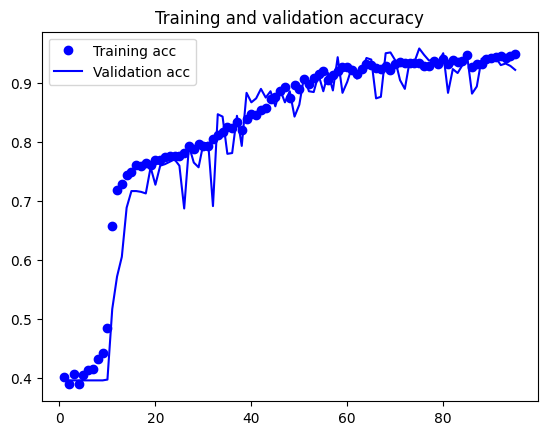

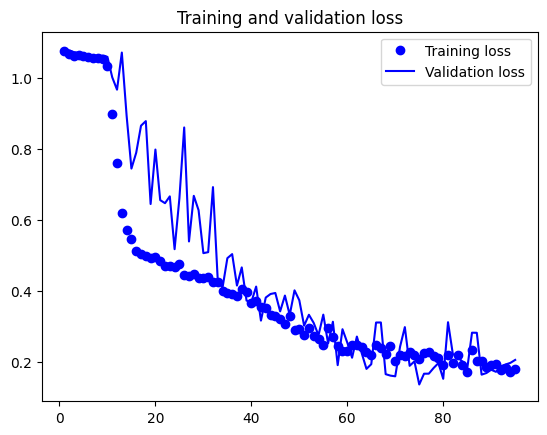

In [131]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
#recall = history.history['recall_1']
#val_recall = history.history['val_recall_1']
#precision = history.history['precision_1']
#val_precision = history.history['val_precision_1']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()





In [133]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

24/24 - 0s - loss: 0.1049 - accuracy: 0.9718 - 257ms/epoch - 11ms/step


In [134]:
# Save the model as a file
#with open('/content/gdrive/My Drive/file.txt', 'w') as f:
#  f.write('content')

models.save_model(model, feature_sets_path + '/' + model_filename)


<ipython-input-134-01c7bb3bc8e8>:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  models.save_model(model, feature_sets_path + '/' + model_filename)


In [135]:
print(feature_sets_path + '/' + model_filename)

/content/drive/MyDrive/new_box/all_targets_1030_5117_3_classes_2023_10_17_13-53_8_8_8_16_16_32.h5


In [137]:
import seaborn as sns
import tensorflow as tf


In [138]:
y_true=y_train
#y_pred=model.predict_classes(x_test)
predict_y=model.predict(x_train)
y_pred=np.argmax(predict_y,axis=1)

109/109 [==============================] - 1s 5ms/step


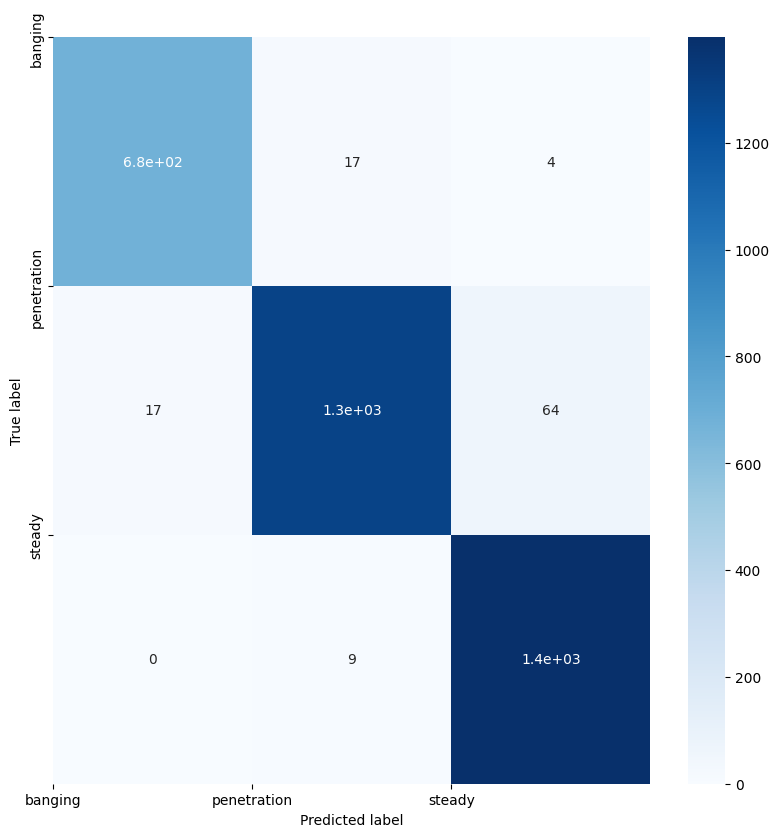

In [139]:
classes = [0,1, 2]
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float')) #/ con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#ax = figure.add_axes([0, 6, 0, 6]) # main axes
plt.xticks([0,1,2],['banging', 'penetration','steady'])
plt.yticks([0,1,2],['banging', 'penetration','steady'])
#plt.xticks([0,1,2,3,4,5,6], ['closed', 'drill','opened', 'openingclosing', 'penetration', 'shake', 'shock'], rotation='vertical')
#plt.yticks([0,1,2,3,4,5,6], ['closed', 'drill','opened', 'openingclosing', 'penetration', 'shake', 'shock'], rotation='horizontal')
#ax.set_xlabels(['closed', 'drill','opened', 'openingclosing', 'penetration', 'shake', 'shock'])
#ax.set_xyabels(['closed', 'drill','opened', 'openingclosing', 'penetration', 'shake', 'shock'])
plt.show()